In [1]:
import pywt

### Available wavelets

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [4]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [5]:
pywt.wavelist(family='morl')

['morl']

In [6]:
pywt.wavelist(family='haar')

['haar']

### Wavelet objects

In [7]:
haar = pywt.Wavelet(name='haar')

In [8]:
morlet = pywt.ContinuousWavelet(name='morl')

In [9]:
level = 1
phi, psi = morlet.wavefun(level)

In [10]:
phi

array([-8.44621402e-15, -8.44621402e-15])

In [11]:
psi

array([-8.,  8.])

In [12]:
print(morlet)

ContinuousWavelet morl
  Family name:    Morlet wavelet
  Short name:     morl
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


### Discrete Wavelet Transform

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<b> Simulate signal for transform </b>

In [14]:
data = 2 * np.sin(np.linspace(-np.pi, np.pi, 20)) + np.random.rand(20)

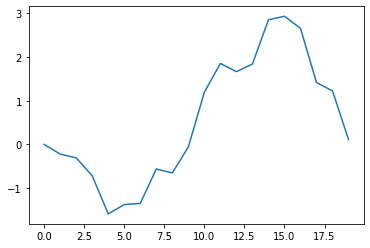

In [15]:
plt.plot(data)

<b>Proceed to transform</b>

In [16]:
# Create the wavelet object
wavelet = pywt.Wavelet(name='haar')

In [17]:
# Discrete transform signal
# cA: Approximateion coefficients
# cD: Detail coefficients
cA, cD = pywt.dwt(data=data, wavelet=wavelet)

In [18]:
cA

array([-0.15570813, -0.72524991, -2.09786236, -1.35150383, -0.50232616,
        2.15586653,  2.47821025,  4.09104171,  2.87932814,  0.94499057])

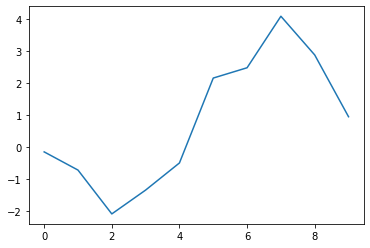

In [19]:
plt.plot(cA)

In [20]:
cD

array([ 0.15610018,  0.28920145, -0.1517317 , -0.55671712, -0.421265  ,
       -0.46610838, -0.12358662, -0.05794813,  0.87770489,  0.78782288])

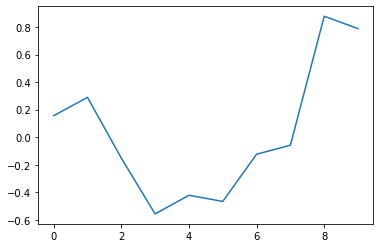

In [21]:
plt.plot(cD)

### Inverse Discrete Wavelet Transform

#### For multilevel reconstruction use _.waverec_

In [23]:
signal = pywt.idwt(cA, cD, wavelet)

In [24]:
signal

array([ 2.77219381e-04, -2.20481772e-01, -3.08332822e-01, -7.17325435e-01,
       -1.59070322e+00, -1.37612218e+00, -1.34931597e+00, -5.61999071e-01,
       -6.53077571e-01, -5.73188920e-02,  1.19483944e+00,  1.85401624e+00,
        1.66497034e+00,  1.83974821e+00,  2.85182782e+00,  2.93377885e+00,
        2.65662353e+00,  1.41536138e+00,  1.22528414e+00,  1.11134337e-01])

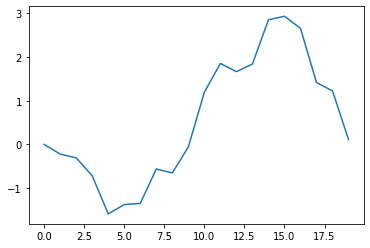

In [25]:
plt.plot(signal)

In [26]:
signalA = pywt.idwt(cA, None, wavelet)

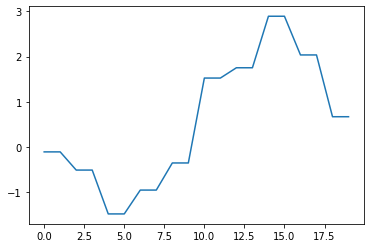

In [28]:
plt.plot(signalA)

In [29]:
signalD = pywt.idwt(cD, None, wavelet)

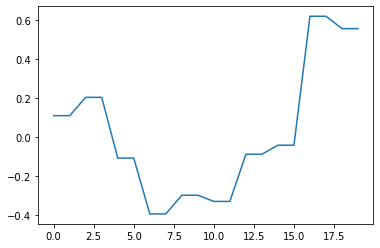

In [30]:
plt.plot(signalD)

<b>Direct reconstruction from coefficients</b>

In [31]:
signalA = pywt.upcoef('a', cA, wavelet)

In [32]:
signalD = pywt.upcoef('d', cD, wavelet)

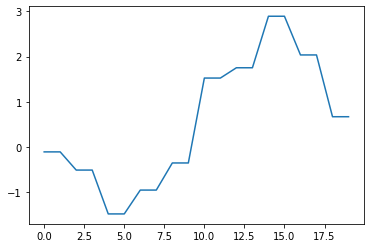

In [33]:
plt.plot(signalA)

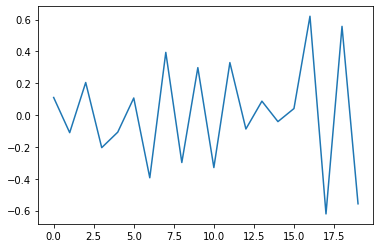

In [34]:
plt.plot(signalD)

### Stationary Wavelet Transform

#### Also known as Algorithme à trous

<b>Multilevel 1D swt</b>

In [35]:
coeffs = pywt.swt(data, wavelet=wavelet)

In [36]:
coeffs

[(array([-0.62293141, -1.41842162, -1.99624183, -2.5167334 , -2.43907022,
         -1.9702574 , -1.31085575, -0.03877805,  1.16922961,  2.32825356,
          3.27678712,  4.1052813 ,  4.64516261,  5.14098921,  4.92879579,
          4.11552395,  2.70420169,  1.37602854,  0.55810696, -0.20870152]),
  array([ 0.40272685,  0.88960703,  0.97058357,  0.20870475, -0.52775518,
         -0.75518075, -0.60045929, -1.1762986 , -1.87962607, -1.19073301,
         -0.22793143, -0.58629473, -1.14044406, -0.44941318,  0.85681088,
          1.47487843,  1.36778322,  1.26461698,  0.77831151,  0.32011308])),
 (array([-0.15570813, -0.37392839, -0.72524991, -1.63202271, -2.09786236,
         -1.9271758 , -1.35150383, -0.85918893, -0.50232616,  0.80434849,
          2.15586653,  2.48829927,  2.47821025,  3.31744523,  4.09104171,
          3.95301144,  2.87932814,  1.86721835,  0.94499057,  0.07877987]),
  array([ 0.15610018,  0.06212007,  0.28920145,  0.61757135, -0.1517317 ,
         -0.01895485, -0.556717

In [37]:
coeffs[0]

(array([-0.62293141, -1.41842162, -1.99624183, -2.5167334 , -2.43907022,
        -1.9702574 , -1.31085575, -0.03877805,  1.16922961,  2.32825356,
         3.27678712,  4.1052813 ,  4.64516261,  5.14098921,  4.92879579,
         4.11552395,  2.70420169,  1.37602854,  0.55810696, -0.20870152]),
 array([ 0.40272685,  0.88960703,  0.97058357,  0.20870475, -0.52775518,
        -0.75518075, -0.60045929, -1.1762986 , -1.87962607, -1.19073301,
        -0.22793143, -0.58629473, -1.14044406, -0.44941318,  0.85681088,
         1.47487843,  1.36778322,  1.26461698,  0.77831151,  0.32011308]))

<b>Inverse stationnary wavelet transform</b>

In [38]:
signal = pywt.iswt(coeffs, wavelet)

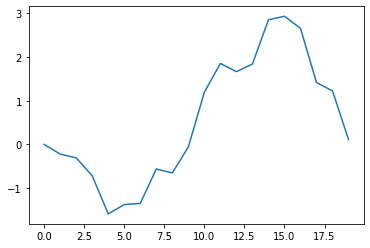

In [39]:
plt.plot(signal)

### Continuous wavelet transforms

In [40]:
morlet = pywt.ContinuousWavelet(name="morl")

In [42]:
print(morlet)

ContinuousWavelet morl
  Family name:    Morlet wavelet
  Short name:     morl
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


In [78]:
scales = [pywt.scale2frequency(morlet, 6 - i) / i for i in range(1,6)]

In [86]:
scales

[0.1625, 0.1015625, 0.09027777777777778, 0.1015625, 0.1625]

In [82]:
coefs, frequencies = pywt.cwt(data, scales, morlet)

In [83]:
coefs

array([[ 4.19130359e-06, -1.70303477e-03, -6.74246587e-04,
        -3.14854978e-03, -6.74285586e-03,  1.65591970e-03,
         1.99577248e-04,  6.07747717e-03, -7.08494457e-04,
         4.58651818e-03,  9.65822087e-03,  5.08938302e-03,
        -1.46070916e-03,  1.33955598e-03,  7.81062162e-03,
         6.35086257e-04, -2.12759059e-03, -9.57848221e-03,
        -1.45669020e-03, -8.59814355e-03],
       [ 1.34766987e-03,  5.36305280e-04,  2.49678175e-03,
         5.33171904e-03, -1.30995523e-03, -1.63644177e-04,
        -4.80634221e-03,  5.56007929e-04, -3.63693462e-03,
        -7.64406488e-03, -4.02408392e-03,  1.15407061e-03,
        -1.06696842e-03, -6.17845362e-03, -5.00287375e-04,
         1.69195315e-03,  7.57754686e-03,  1.16036664e-03,
         6.80156266e-03,  6.78443021e-04],
       [ 7.71704041e-05,  3.07099655e-05,  1.42970961e-04,
         3.05305418e-04, -7.50107846e-05, -9.37060889e-06,
        -2.75221239e-04,  3.18381805e-05, -2.08258507e-04,
        -4.37715193e-04, -2.3

In [84]:
frequencies

array([5., 8., 9., 8., 5.])

In [77]:
coefs[0][0]

array([ 0.00960886,  0.00337192,  0.0221548 ,  0.010573  , -0.04612456,
       -0.02252532, -0.0226275 ,  0.01946158, -0.03248202, -0.03468003,
        0.03379071,  0.04752716, -0.0174439 , -0.03264181,  0.04112746,
        0.05173593,  0.04030745, -0.02171893,  0.01220797, -0.039296  ])

#### Doc example 1

In [87]:
x = np.arange(512)
y = np.sin(2 * np.pi * x / 32)
coef, freq = pywt.cwt(y, np.arange(1, 129), 'gaus1')

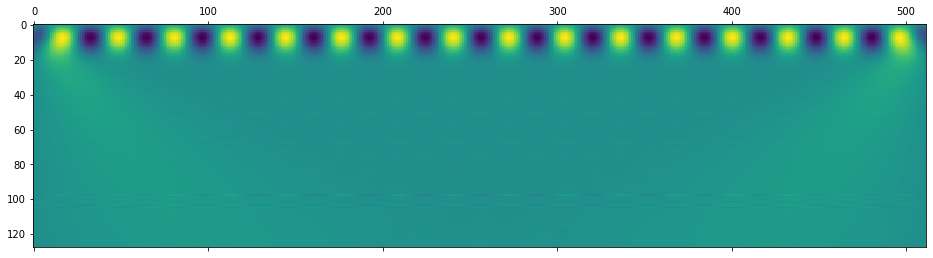

In [88]:
plt.matshow(coef)

In [92]:
coef.shape

(128, 512)

#### Doc example 2

In [93]:
t = np.linspace(-1, 1, 200, endpoint=False)

In [94]:
sig = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))

In [95]:
sig

array([ 1.00000034e+00,  9.04827303e-01,  6.37424092e-01,  2.48689764e-01,
       -1.87381761e-01, -5.87786142e-01, -8.76308161e-01, -9.98028975e-01,
       -9.29779703e-01, -6.84551528e-01, -3.09022886e-01,  1.25325583e-01,
        5.35817078e-01,  8.44315824e-01,  9.92099905e-01,  9.51038737e-01,
        7.28947630e-01,  3.68100184e-01, -6.28182880e-02, -4.81784698e-01,
       -8.09050900e-01, -9.82323365e-01, -9.68620439e-01, -7.70550182e-01,
       -4.25813844e-01, -2.94782161e-05,  4.25758309e-01,  7.70505001e-01,
        9.68592809e-01,  9.82320907e-01,  8.09081784e-01,  4.81857735e-01,
        6.29429588e-02, -3.67913757e-01, -7.28688796e-01, -9.50696527e-01,
       -9.91663339e-01, -8.43774349e-01, -5.35161128e-01, -1.24547283e-01,
        3.09928876e-01,  6.85587021e-01,  9.30941851e-01,  9.99309014e-01,
        8.77690041e-01,  5.89245082e-01,  1.88882764e-01, -2.47193378e-01,
       -6.35992077e-01, -9.03533721e-01, -9.98934551e-01, -9.04094745e-01,
       -6.37146229e-01, -

In [96]:
widths = np.arange(1,31)

In [97]:
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')

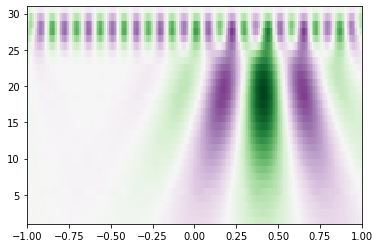

In [99]:
plt.imshow(cwtmatr, extent=[-1,1,1,31], cmap='PRGn', aspect='auto',
          vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

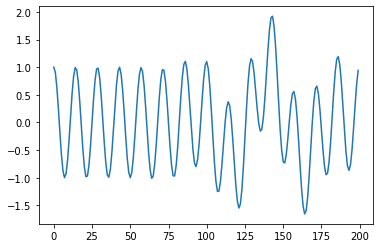

In [101]:
plt.plot(sig)

In [102]:
cwtmatr

array([[ 0.12431304,  0.77070244,  0.50238917, ...,  0.03958089,
         0.40605807,  0.80210377],
       [ 0.69308482,  1.41087083,  1.57234825, ...,  0.56071765,
         1.24796812,  1.35251469],
       [ 1.33630703,  1.78780772,  1.81431953, ...,  0.41648293,
         1.15455546,  1.42187524],
       ...,
       [ 0.07840119,  0.05331889,  0.10181679, ..., -0.24436671,
        -0.16837688, -0.17127114],
       [ 0.08104904,  0.05759207,  0.03553738, ..., -0.27614101,
        -0.28998893, -0.22949606],
       [ 0.08482343,  0.06911481,  0.05253281, ..., -0.37098401,
        -0.32094346, -0.26638691]])

In [103]:
sig.shape

(200,)

In [104]:
cwtmatr.shape

(30, 200)